# Pair Problem: Prime Factors

Another one from Project Euler: [Problem 3](https://projecteuler.net/problem=3):

> The prime factors of 13195 are 5, 7, 13 and 29.

> What is the largest prime factor of the number 600851475143 ?

**Please do not Google. See how best you can solve this problem on your own.** 

*What's your the complexity? Can you do better?*

# Solution:

A prime number is not divisible by any number but itself. We can write a function to check if a number is prime checking to see if it is divisible by any number.

Then we can loop from the given N downwards, see if any of the numbers is both a factor of N and a prime number.

We go through N numbers and prime check on each would be another N steps. So the complexity of the code is **O(N^2)**. Which isn't that good. And it wouldn't work on the big test case we have.

In [45]:
def isPrime(n):
    for i in range(2,n):
        if n%i==0:
            return False
    return True

def largestPrimeFactor(n):
    for i in range(n,1,-1):
        if n%i==0:
            if isPrime(i):
                return i

When we factor a number, we get two pieces. For example IxJ=N. Of I and J, atleast one of them is less than sqrt(N). Since sqrt(N) x sqrt(N) = N. We can use this fact and just go from 2 to sqrt(N) in our main function. Each time, we have two factors I and J, and we'll check to see if either of them are prime.

We can also use the same logic in our isPrime function and just have the loop go from 2 to sqrt(N). BUT WAIT: notice that isPrime() actually runs on the sqrt(i), which is sqrt(sqrt(N))!

So, the complexity of the code becomes sqrt(N) x sqrt(sqrt(N)) so it's N^.5 x N^.25 = **O(N^3/4)**... which is better.

But can we do better-er?

In [19]:
def isPrime(n):
    for i in range(2,int(n**0.5)+1):
        if n%i==0:
            return False
    return True

def largestPrimeFactor(n):
    candidate=n
    for i in range(2,int(n**0.5)+1):
        if n%i==0:
            if isPrime(n//i):
                return n//i
            elif isPrime(i):
                candidate=i
    return candidate

> Note: the sqrt(N) iteration only works when going up from 2, not down from N. The largest prime of 33 is 11, which is more than sqrt(33). However, we catch 11 by 33//3 on the way up.

Any number can be broken down to a product of it's prime factors. For example, 100 = 2x2x5x5. So let's start with 2 and divide the number as long as it's divisible by 2. Then we move onto 3 and 4. We keep doing this until the number is not divisible anymore and just print it. In this method, there is no reason to check for primes. If a number is divisible by 4, say, we would have already divided it by 2 twice. And the final number we are left with would be the largest prime factor.

We just have a single loop going to sqrt(N). So the complexity of this code is **O(sqrtN)**.

In [2]:
def largestPrimeFactor(n):
    i=2
    while i<=n**0.5:
        if n%i==0:
            n = n//i
        else:
            i+=1
    return n

In [14]:
%%timeit

# check result
largestPrimeFactor(600851475143)

303 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [46]:
#%%timeit
# run timeit cell magic to check runtime of a number

largestPrimeFactor(33)

11

In [44]:
%%timeit
# timeit with double that number, can you infer complexity?

largestPrimeFactor(326)

# partially, there are other factors like complexity of this instance (vs. worst case), OS overhead, etc.

10000 loops, best of 3: 31.4 µs per loop


Below are some graphs to show how "N vs N^2" look, followed by how "N vs sqrtN" look. Followed by how "sqrtN vs logN" look.

From a speed point of view, the small to large would be:
- logN
- sqrtN
- N
- N-logN
- etc

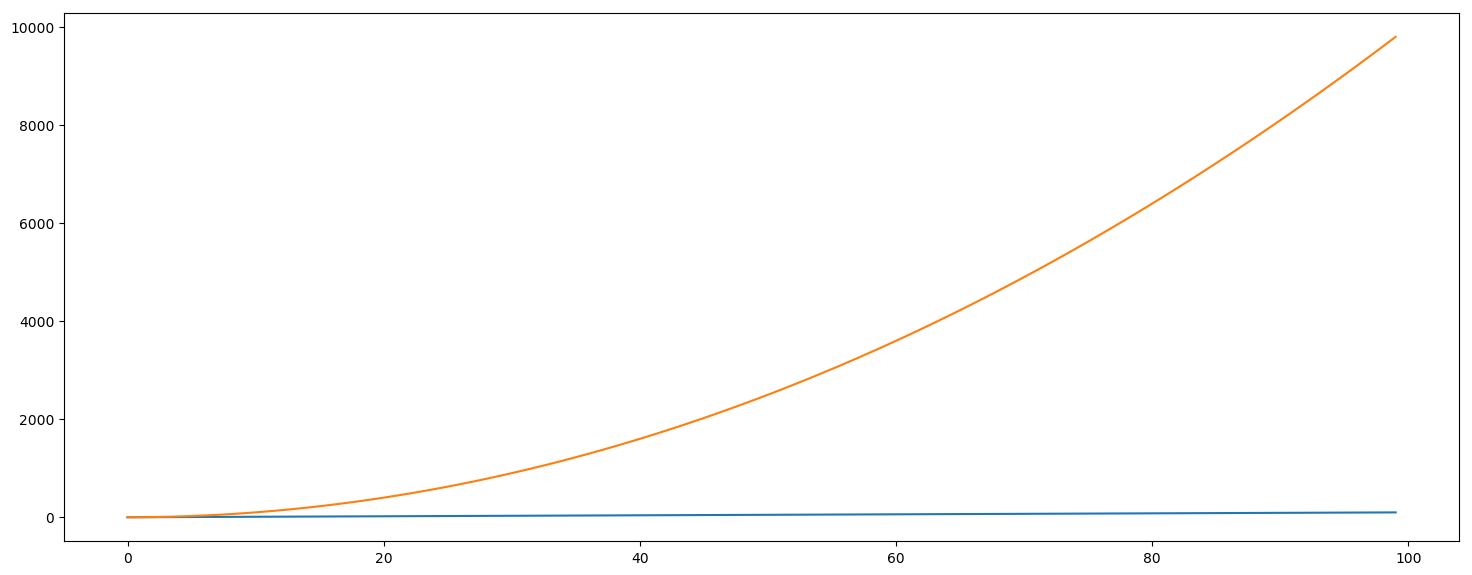

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline
x = range(100)
plt.plot(x,x,x,[i**2 for i in x])
plt.show()

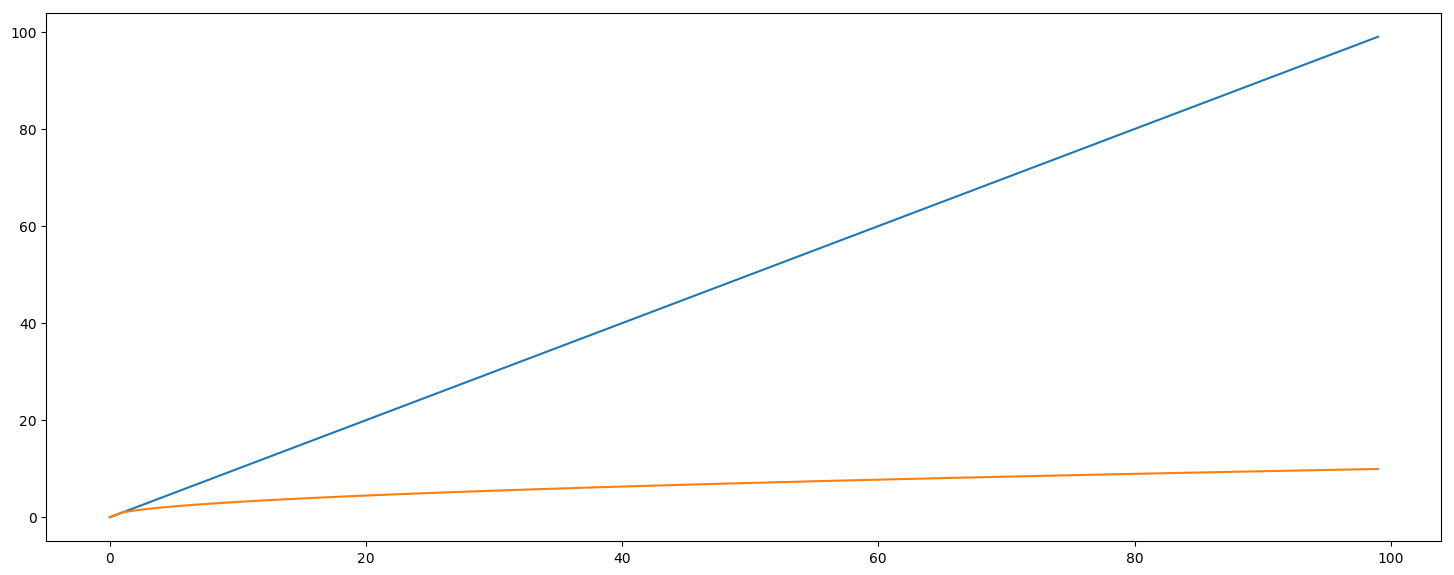

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline
x = range(100)
plt.plot(x,x,x,[i**0.5 for i in x])
plt.show()

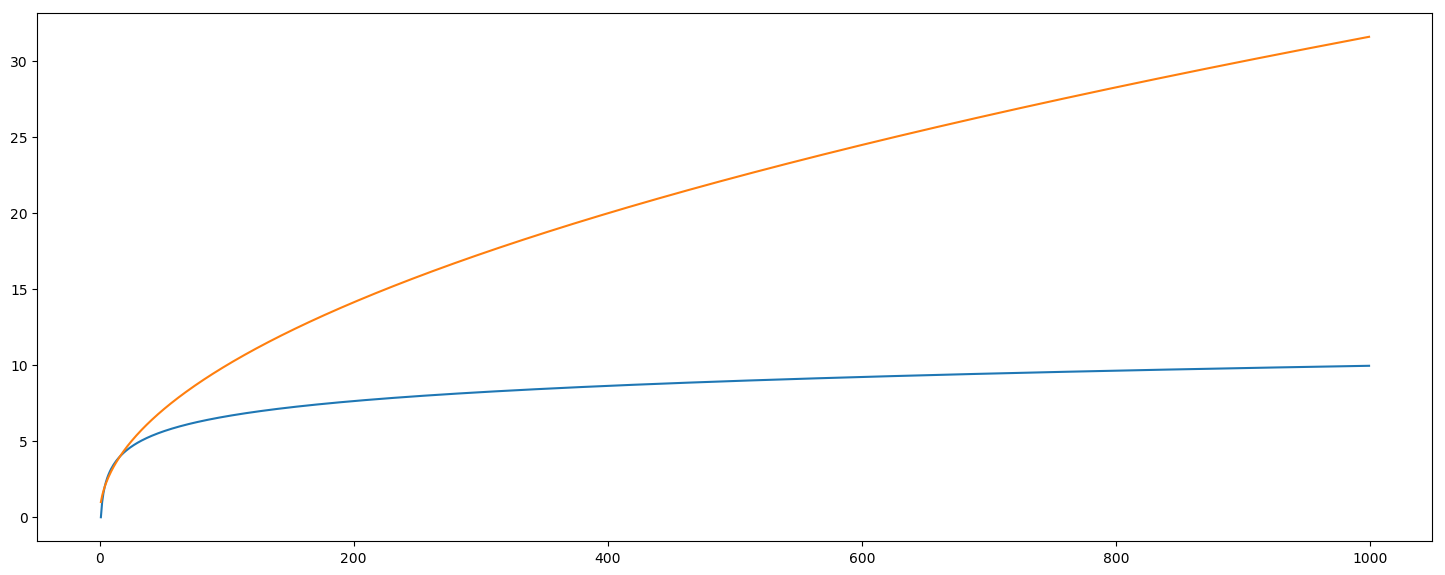

In [10]:
import math
import matplotlib.pyplot as plt
% matplotlib inline
x = range(1,1000)
plt.plot(x,[math.log(i,2) for i in x],x,[i**0.5 for i in x])
plt.show()

### Additional Resources:

- [Complexity of Python Operations](https://www.ics.uci.edu/~brgallar/week8_2.html)
- [A beginner's guide to Big O notation](https://rob-bell.net/2009/06/a-beginners-guide-to-big-o-notation/)